In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations. (zip() pairs them up to make full set of coordinates)

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
     # If the city is unique, then we will add it to the cities list.
        
    if city not in cities:
        
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)
    

631

In [5]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.

record_count = 1

set_count = 1

# Loop through all the cities in the list.

for i, city, in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.

    if (i % 50 == 0 and i >= 50): #this is just to make it pause every 60 secs to split up API calls and create "sets" of 50

        set_count += 1

        record_count = 1

        time.sleep(60)

    # Create endpoint URL with each city.

    city_url = url + "&q=" + city.replace(" ","+") #replacing spaces in the city names with +


    # Log the URL, record, and set numbers and the city.

    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count.
        
    record_count += 1
        
    # Run an API request for each of the cities.
            
    try: 
                
        # Parse the JSON and retrieve data.
                    
        city_weather = requests.get(city_url).json()
            
        # Parse out the needed data.
                
        city_lat = city_weather["coord"]["lat"]
                
        city_lng = city_weather["coord"]["lon"]
                
        city_max_temp = city_weather["main"]["temp_max"]
                
        city_humidity = city_weather["main"]["humidity"]
                
        city_clouds = city_weather["clouds"]["all"]
                
        city_wind = city_weather["wind"]["speed"]
                
        city_country = city_weather["sys"]["country"]
                
        # Convert the date to ISO standard.
                
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
                
            # Append the city information into city_data list.
                    
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
                    
        # If an error is experienced, skip the city.
                
    except:
                
        print("City not found. Skipping...")
                
        pass
    
# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | soma
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | manama
Processing Record 4 of Set 1 | saleaula
City not found. Skipping...
Processing Record 5 of Set 1 | artur nogueira
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | paso de los toros
Processing Record 8 of Set 1 | paso de carrasco
Processing Record 9 of Set 1 | tomatlan
Processing Record 10 of Set 1 | alcantara
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | esperance
Processing Record 18 of Set 1 | bambanglipuro
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | maniitsoq
Processing Record

Processing Record 39 of Set 4 | xai-xai
Processing Record 40 of Set 4 | tessalit
Processing Record 41 of Set 4 | brasileia
Processing Record 42 of Set 4 | port-de-paix
City not found. Skipping...
Processing Record 43 of Set 4 | samusu
City not found. Skipping...
Processing Record 44 of Set 4 | kushima
Processing Record 45 of Set 4 | vallenar
Processing Record 46 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 4 | saint george
Processing Record 48 of Set 4 | noormarkku
Processing Record 49 of Set 4 | zverinogolovskoye
Processing Record 50 of Set 4 | hofn
Processing Record 1 of Set 5 | nuristan
Processing Record 2 of Set 5 | jaisalmer
Processing Record 3 of Set 5 | vardo
Processing Record 4 of Set 5 | kadaya
Processing Record 5 of Set 5 | walvis bay
Processing Record 6 of Set 5 | cidreira
Processing Record 7 of Set 5 | cuamba
Processing Record 8 of Set 5 | amderma
City not found. Skipping...
Processing Record 9 of Set 5 | mecca
Processing Record 10 of Set 5

Processing Record 33 of Set 8 | sorong
Processing Record 34 of Set 8 | avera
Processing Record 35 of Set 8 | erzin
Processing Record 36 of Set 8 | kabare
Processing Record 37 of Set 8 | marcona
City not found. Skipping...
Processing Record 38 of Set 8 | buta
Processing Record 39 of Set 8 | mount gambier
Processing Record 40 of Set 8 | adre
Processing Record 41 of Set 8 | lushunkou
City not found. Skipping...
Processing Record 42 of Set 8 | clyde river
Processing Record 43 of Set 8 | palani
Processing Record 44 of Set 8 | rawson
Processing Record 45 of Set 8 | salamiyah
Processing Record 46 of Set 8 | katherine
Processing Record 47 of Set 8 | karratha
Processing Record 48 of Set 8 | solnechnyy
Processing Record 49 of Set 8 | santa cruz
Processing Record 50 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 1 of Set 9 | montrose
Processing Record 2 of Set 9 | galchino
City not found. Skipping...
Processing Record 3 of Set 9 | honiara
Processing Record 4 of Set 9 | lin

Processing Record 20 of Set 12 | kidal
Processing Record 21 of Set 12 | marienburg
Processing Record 22 of Set 12 | guia de isora
Processing Record 23 of Set 12 | oranjestad
Processing Record 24 of Set 12 | sabae
Processing Record 25 of Set 12 | eenhana
Processing Record 26 of Set 12 | atyrau
Processing Record 27 of Set 12 | yertsevo
Processing Record 28 of Set 12 | martaban
Processing Record 29 of Set 12 | meulaboh
Processing Record 30 of Set 12 | ust-ishim
Processing Record 31 of Set 12 | palana
Processing Record 32 of Set 12 | nakano
Processing Record 33 of Set 12 | rundu
Processing Record 34 of Set 12 | gimli
Processing Record 35 of Set 12 | yatou
Processing Record 36 of Set 12 | kutum
Processing Record 37 of Set 12 | pine bluff
Processing Record 38 of Set 12 | black diamond
Processing Record 39 of Set 12 | hobyo
Processing Record 40 of Set 12 | nortelandia
Processing Record 41 of Set 12 | bien hoa
Processing Record 42 of Set 12 | rio brilhante
Processing Record 43 of Set 12 | luan

In [7]:
len(city_data)

584

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Soma,39.1855,27.6094,87.75,26,0,20.56,TR,2022-07-20 12:41:16
1,Atuona,-9.8000,-139.0333,76.98,78,53,13.80,PF,2022-07-20 12:41:17
2,Manama,26.2154,50.5832,102.38,59,45,12.66,BH,2022-07-20 12:39:30
3,Artur Nogueira,-22.5731,-47.1725,66.31,53,0,6.82,BR,2022-07-20 12:41:18
4,Vaini,-21.2000,-175.2000,73.56,88,75,8.05,TO,2022-07-20 12:41:18
5,Paso De Los Toros,-32.8167,-56.5167,52.29,82,0,9.98,UY,2022-07-20 12:41:19
6,Paso De Carrasco,-34.8603,-56.0522,45.05,93,0,11.50,UY,2022-07-20 12:41:19
7,Tomatlan,19.9333,-105.2500,75.85,86,98,2.55,MX,2022-07-20 12:41:19
8,Alcantara,-2.4089,-44.4147,86.20,72,38,1.72,BR,2022-07-20 12:41:20
9,Albany,42.6001,-73.9662,80.58,83,10,1.01,US,2022-07-20 12:38:10


In [9]:
# reorder the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Soma,TR,2022-07-20 12:41:16,39.1855,27.6094,87.75,26,0,20.56
1,Atuona,PF,2022-07-20 12:41:17,-9.8000,-139.0333,76.98,78,53,13.80
2,Manama,BH,2022-07-20 12:39:30,26.2154,50.5832,102.38,59,45,12.66
3,Artur Nogueira,BR,2022-07-20 12:41:18,-22.5731,-47.1725,66.31,53,0,6.82
4,Vaini,TO,2022-07-20 12:41:18,-21.2000,-175.2000,73.56,88,75,8.05


In [10]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

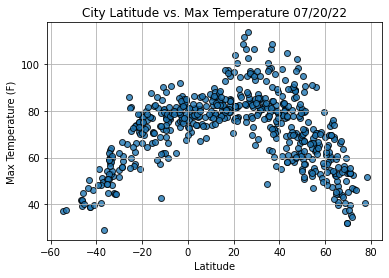

In [12]:
import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           max_temps,
           edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid()

# Save the figure.

plt.savefig("weather_data/Fig1.png")

plt.show()

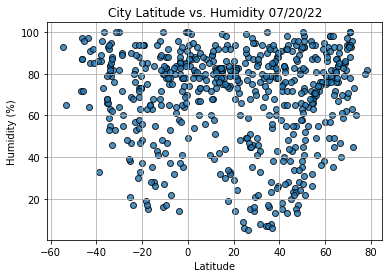

In [13]:
plt.scatter(lats,
           humidity,
           edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid()

# Save the figure.

plt.savefig("weather_data/Fig2.png")

plt.show()

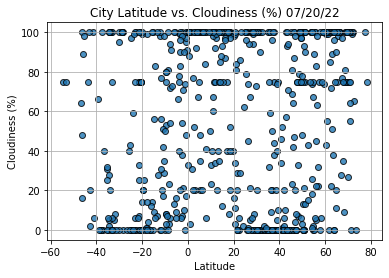

In [14]:
plt.scatter(lats,
           cloudiness,
           edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid()

# Save the figure.

plt.savefig("weather_data/Fig3.png")

plt.show()

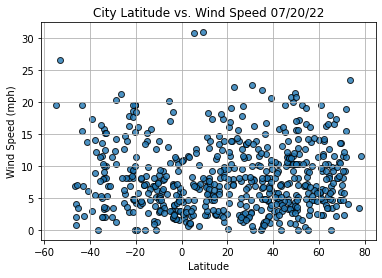

In [15]:
plt.scatter(lats,
           wind_speed,
           edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid()

# Save the figure.

plt.savefig("weather_data/Fig4.png")

plt.show()

In [16]:
# Import linregress

from scipy.stats import linregress


# Create a function to create perform linear regression on the weather data

# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()
    
    

In [17]:
index13 = city_data_df.loc[13]

index13

City                      Talnakh
Country                        RU
Date          2022-07-20 12:41:21
Lat                       69.4865
Lng                       88.3972
Max Temp                    54.73
Humidity                       69
Cloudiness                    100
Wind Speed                   5.99
Name: 13, dtype: object

In [18]:
# get df of northern hemisphere (latitudes north of equator)

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

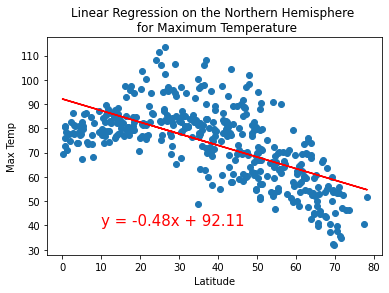

In [19]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       title='Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       y_label='Max Temp',text_coordinates=(10,40))


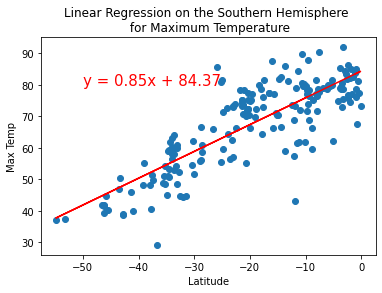

In [23]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       title='Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       y_label='Max Temp',text_coordinates=(-50,80))


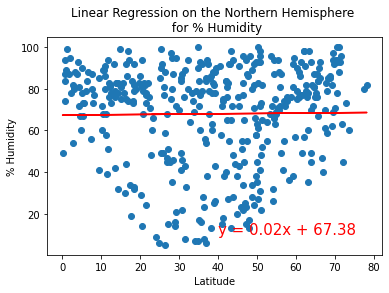

In [26]:
x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       title='Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       y_label='% Humidity',text_coordinates=(40,10))

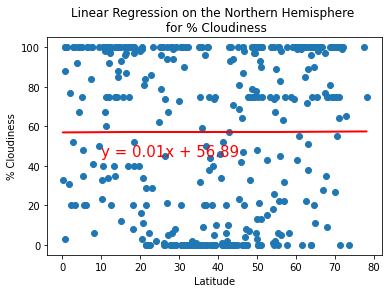

In [38]:
# northern for % Cloudiness

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       title='Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                    
                       y_label='% Cloudiness', text_coordinates=(10, 45))

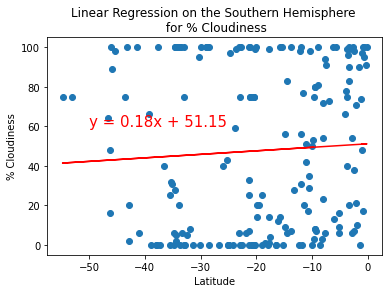

In [42]:
# southern for % Cloudiness

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       title='Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                    
                       y_label='% Cloudiness', text_coordinates=(-50, 60))

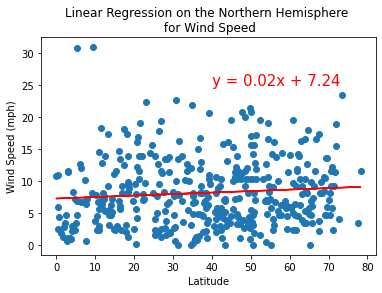

In [50]:
# northern for wind speed

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       title='Linear Regression on the Northern Hemisphere \n for Wind Speed',
                    
                       y_label='Wind Speed (mph)', text_coordinates=(40, 25))

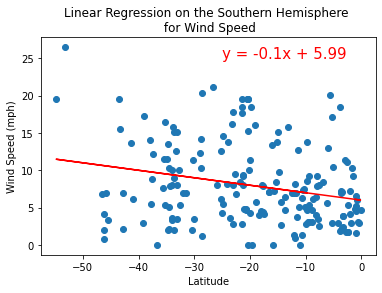

In [54]:
# southern for wind speed

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       
                       title='Linear Regression on the Southern Hemisphere \n for Wind Speed',
                    
                       y_label='Wind Speed (mph)', text_coordinates=(-25, 25))